In [ ]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score

In [ ]:
ionosphere = pd.read_csv("ionosphere_data.csv", header=None)
print(ionosphere.head())
#X = ionosphere.drop("column_ai",axis=1)

         0         1         2         3         4         5         6   \
0  column_a  column_b  column_c  column_d  column_e  column_f  column_g   
1         1         0   0.99539  -0.05889   0.85243   0.02306   0.83398   
2         1         0         1  -0.18829   0.93035  -0.36156  -0.10868   
3         1         0         1  -0.03365         1   0.00485         1   
4         1         0         1  -0.45161         1         1   0.71216   

         7         8         9   ...        25         26         27  \
0  column_h  column_i  column_j  ...  column_z  column_aa  column_ab   
1  -0.37708         1   0.03760  ...  -0.51171    0.41078   -0.46168   
2  -0.93597         1  -0.04549  ...  -0.26569   -0.20468   -0.18401   
3  -0.12062   0.88965   0.01198  ...  -0.40220    0.58984   -0.22145   
4        -1         0         0  ...   0.90695    0.51613          1   

          28         29         30         31         32         33         34  
0  column_ac  column_ad  column_ae 

In [ ]:
le = LabelEncoder()
for col in ionosphere.columns:
    if ionosphere[col].dtype == 'object':
        ionosphere[col] = le.fit_transform(ionosphere[col])

#Arbre de décision classique



In [ ]:
# Diviser les données en attributs et en sortie
X = ionosphere.drop(34, axis=1)
X = ionosphere.drop(0,axis=0)
#X = data.drop('Temperature1', axis=1)
y = ionosphere[34]
y = ionosphere.drop(0,axis=0)

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(X, y)
dt_time = time.time() -  start_time
y_pred = clf.predict(X)
#f_score = f1_score(y, y_pred)
print("Decision Tree execution time: {:.4f} seconds".format(dt_time))
#print(" F score: {:.2f}%".format(f_score))

NameError: ignored

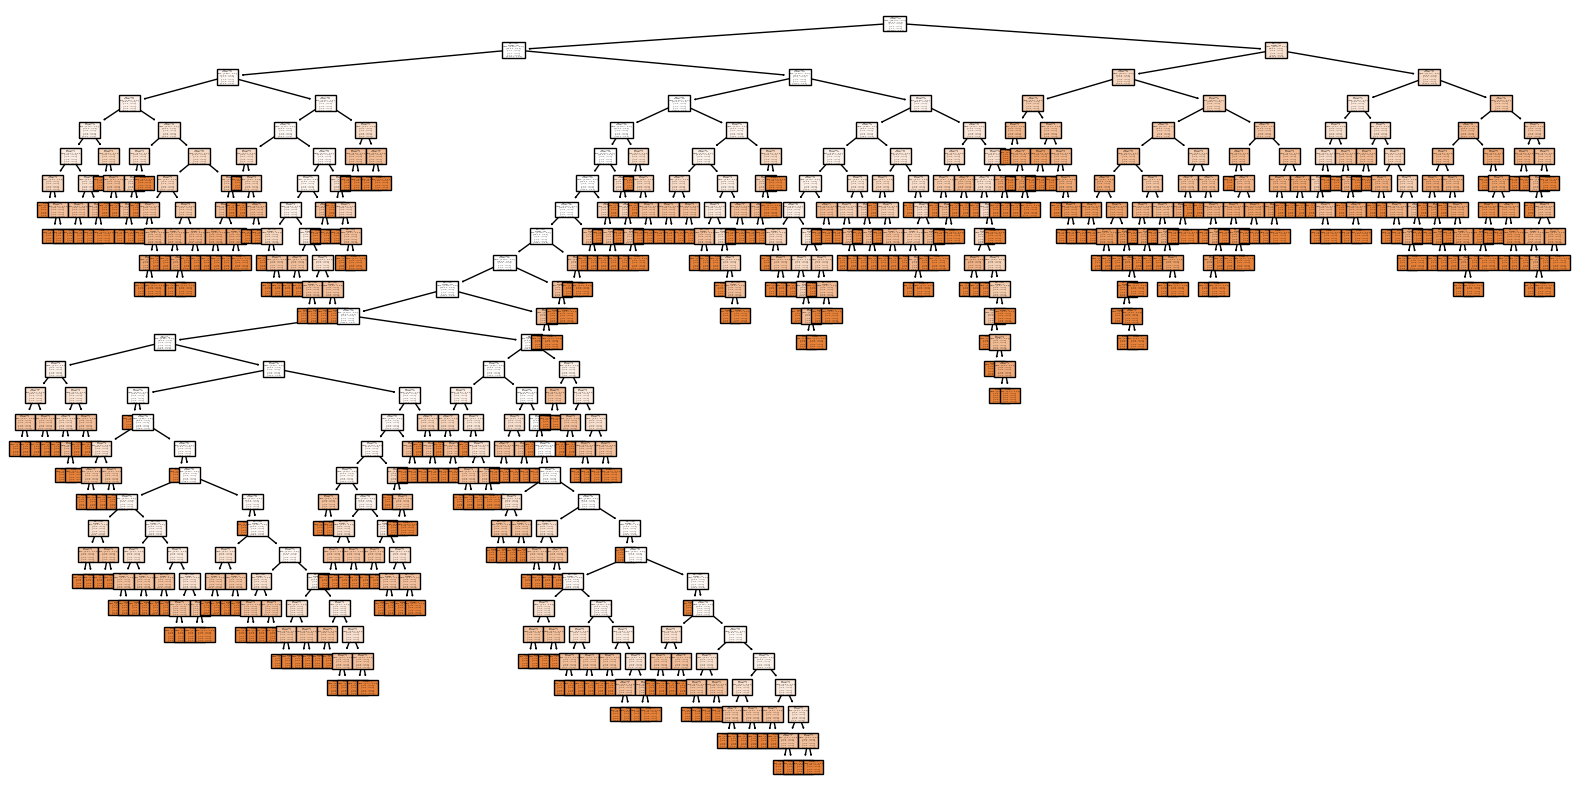

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show()

#Arbre de décision avec élagage

In [ ]:
# Séparer les features et les labels
X = ionosphere.iloc[:, :-1]
y = ionosphere.iloc[:, -1]
start_time = time.time()
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un objet d'arbre de décision avec élagage
tree = DecisionTreeClassifier(random_state=42)

# Paramètres pour la validation croisée
param_grid = {'max_depth': range(1, 10), 'min_samples_leaf': range(1, 10)}

# Effectuer la validation croisée
grid_search = GridSearchCV(tree, param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params = grid_search.best_params_

# Créer l'arbre de décision avec les meilleurs paramètres
tree = DecisionTreeClassifier(max_depth=best_params['max_depth'], min_samples_leaf=best_params['min_samples_leaf'], random_state=42)
tree.fit(X_train, y_train)

# Évaluer la précision de l'arbre de décision sur l'ensemble de test
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
elag_time = time.time() - start_time
print(" Elagage Accuracy: {:.2f}%".format(accuracy*100))
print("Decision Tree execution time: {:.4f} seconds".format(elag_time))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


 Elagage Accuracy: 94.37%
Decision Tree execution time: 7.0442 seconds


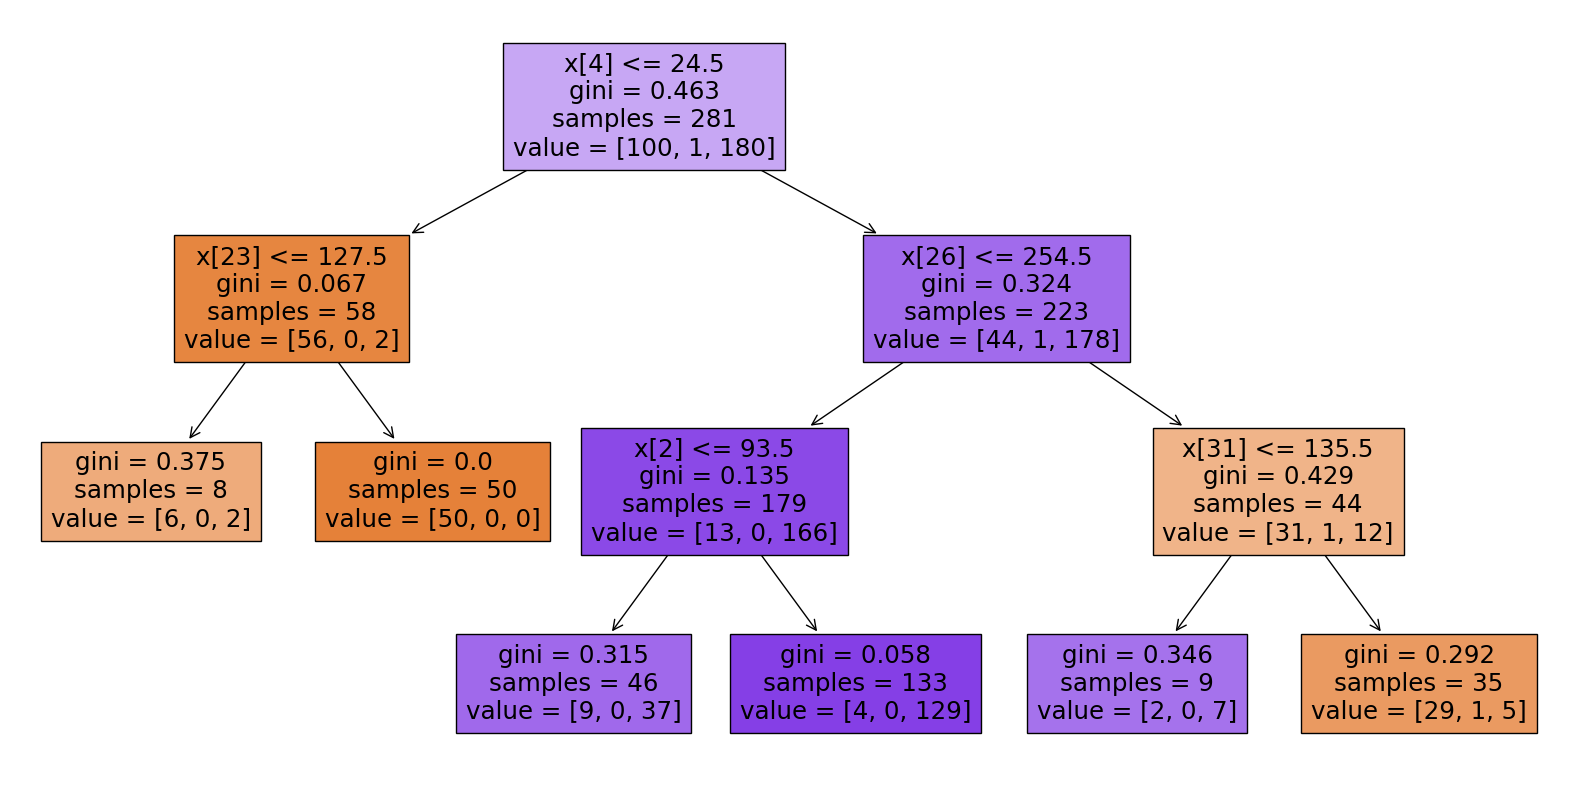

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True)
plt.show()

#Avec adaboost

In [ ]:

# Split the dataset into training and testing sets
X = ionosphere.drop(0,axis=0)
Y = ionosphere.drop(0,axis=0)
X_train, X_test, y_train, y_test = train_test_split(X.drop(34, axis=1), Y[34], test_size=0.3, random_state=42)

# Train an AdaBoost classifier with decision tree base estimator
start_time = time.time()
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)
ada_time = time.time() - start_time

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
start_time = time.time()
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
dt_time = time.time() - start_time

In [1]:
# Make predictions on the testing set
y_pred_ada = ada_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

NameError: ignored

In [ ]:
# Calculate the accuracy of the classifiers
ada_accuracy = accuracy_score(y_test, y_pred_ada)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [ ]:
# Print the accuracy and execution time of the classifiers
print("AdaBoost accuracy: {:.2f}%".format(ada_accuracy*100))
print("Decision Tree accuracy: {:.2f}%".format(dt_accuracy*100))
print("AdaBoost execution time: {:.4f} seconds".format(ada_time))
print("Decision Tree execution time: {:.4f} seconds".format(dt_time))

AdaBoost accuracy: 91.51%
Decision Tree accuracy: 90.57%
AdaBoost execution time: 0.2717 seconds
Decision Tree execution time: 0.0374 seconds


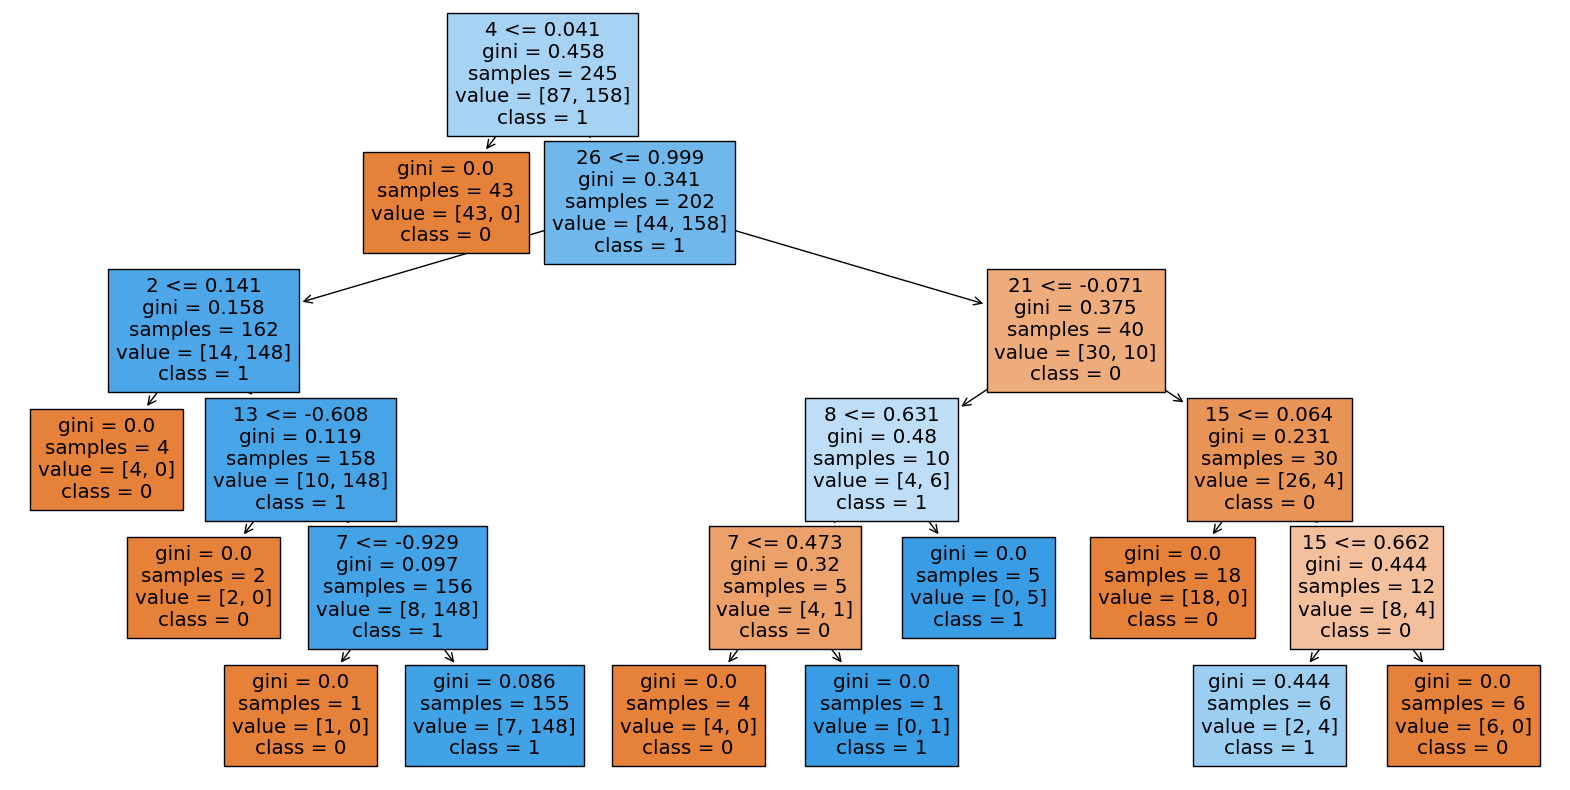

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_clf, filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.show(dt_clf)